# Code for Figures 3-4 based on Pearson’s correlations

Eduard Klapwijk

Load libraries to produce figures:

In [ ]:
# load libraries
library(dplyr)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: usethis

Skipping install of 'neuroUp' from a github remote, the SHA1 (e2603d42) has not changed since last install.
  Use `force = TRUE` to force installation

Set seed and create Figure 3a for the Feedback task DLPFC ROI:

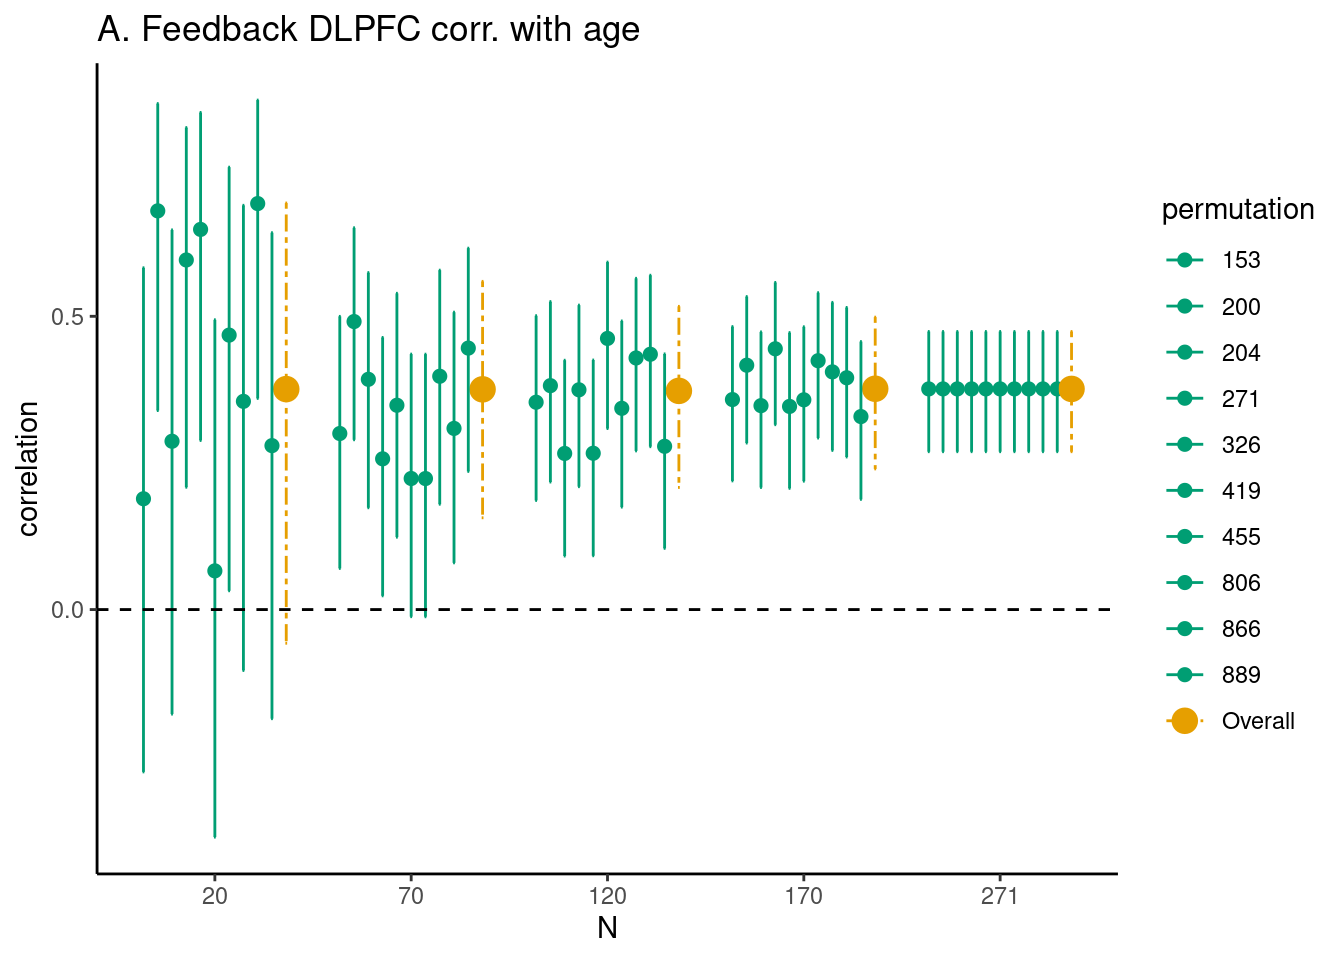

In [ ]:
# set seed
set.seed(1234)

# calculate difference mfg_learning vs. mfg_application
data_feedback <- feedback
data_feedback$dif <- data_feedback$mfg_learning - data_feedback$mfg_application

# Estimate correlations
feedback_fig <- estim_corr(data = data_feedback,
                           vars_of_interest = c("dif", "age"),
                           sample_size = 20:271, 
                           k = 1000, 
                           name = "A. Feedback DLPFC corr. with age")
# plot figure 3a
feedback_fig$fig_corr


Plot Figure 4a for the Feedback task DLPFC ROI:

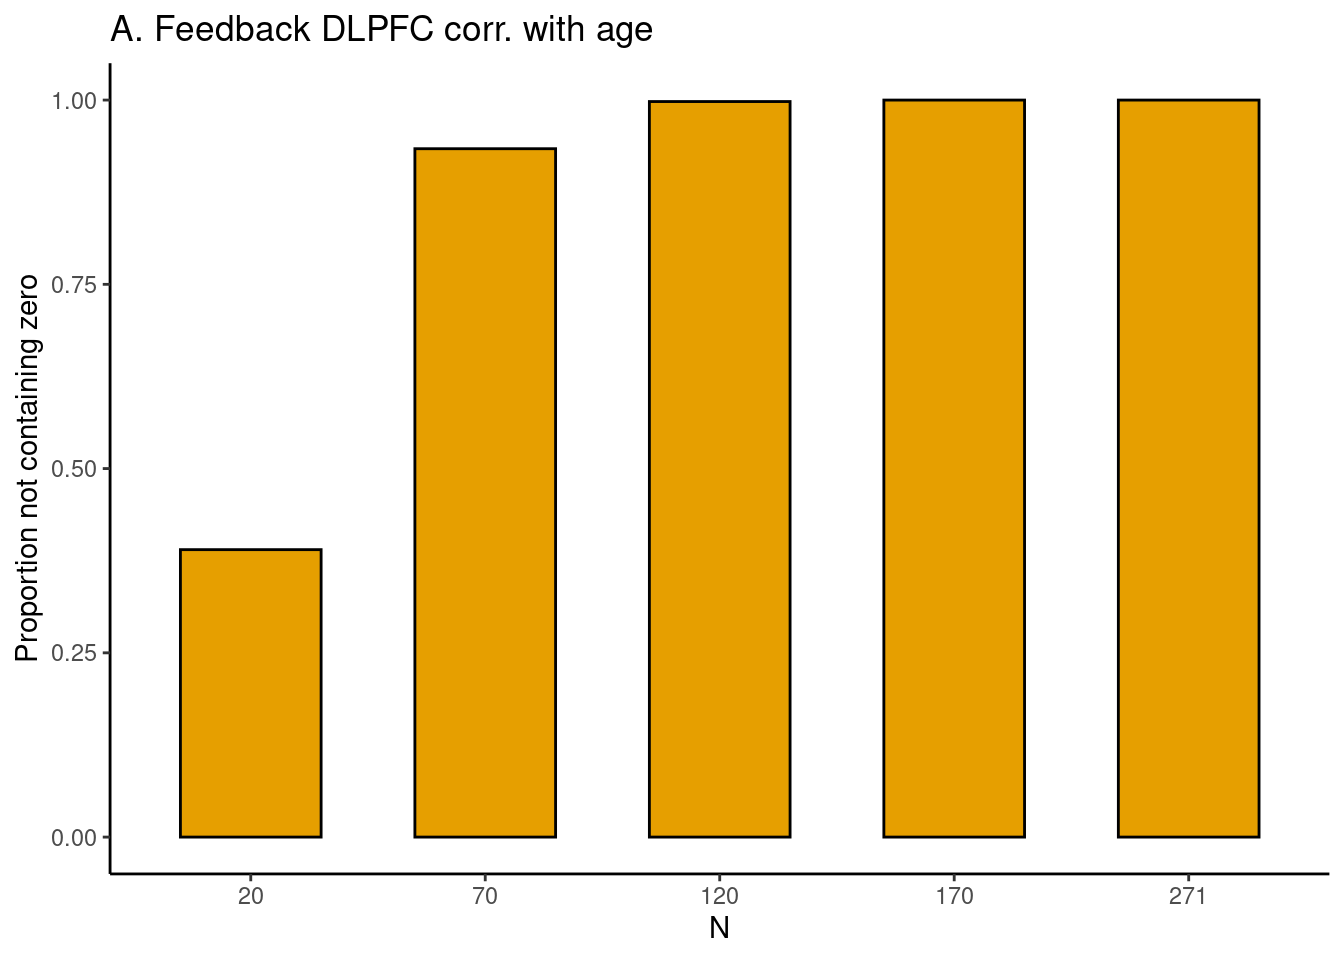

In [ ]:
# plot figure 4a
feedback_fig$fig_corr_nozero


Set seed and create Figure 3b for the Gambling task NAcc ROI:

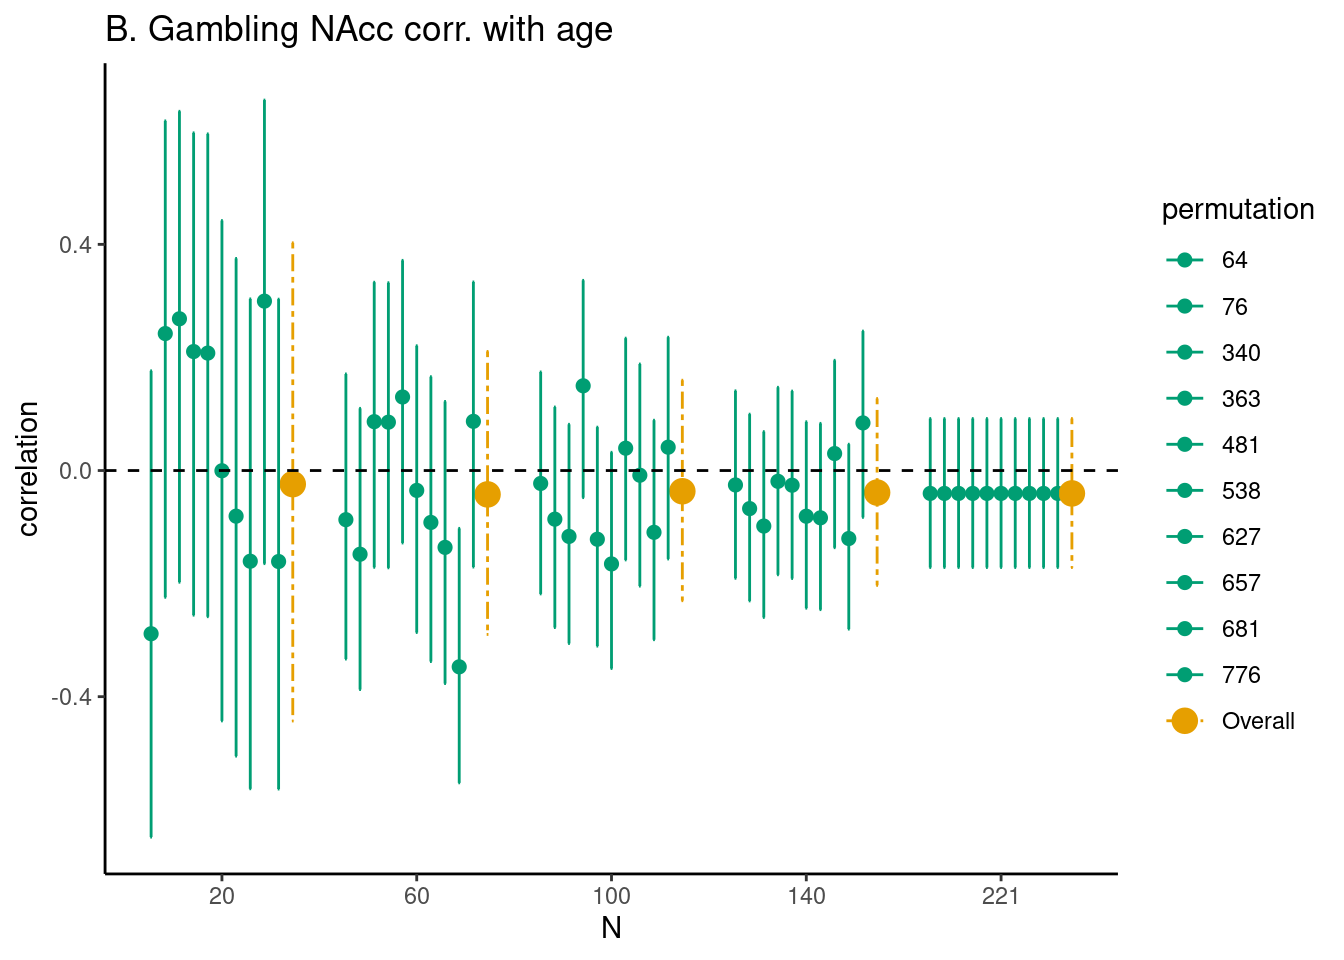

In [ ]:
# set seed
set.seed(1234)

# Estimate correlations
gambling_fig <- estim_corr(data = gambling, 
                           vars_of_interest = c("lnacc_self_winvsloss", 
                                                "age"), 
                           sample_size = 20:221, 
                           k = 1000, 
                           name = "B. Gambling NAcc corr. with age")

# plot figure 3b
gambling_fig$fig_corr


Plot Figure 4b for the Gambling task NAcc ROI:

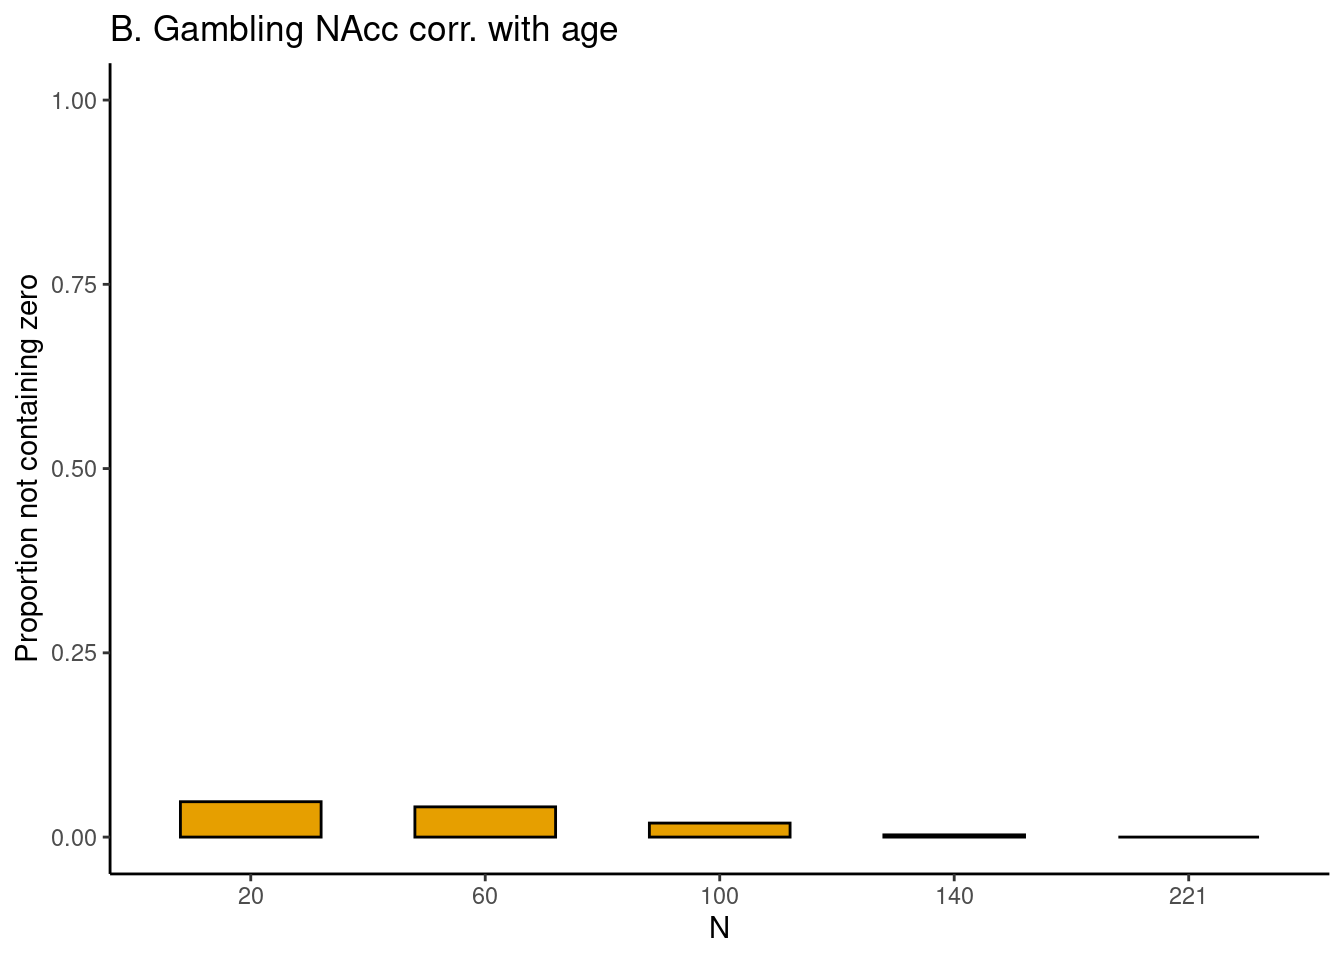

In [ ]:
# plot figure 4b
gambling_fig$fig_corr_nozero


Set seed and create Figure 3c for the Self-evaluations task mPFC ROI:

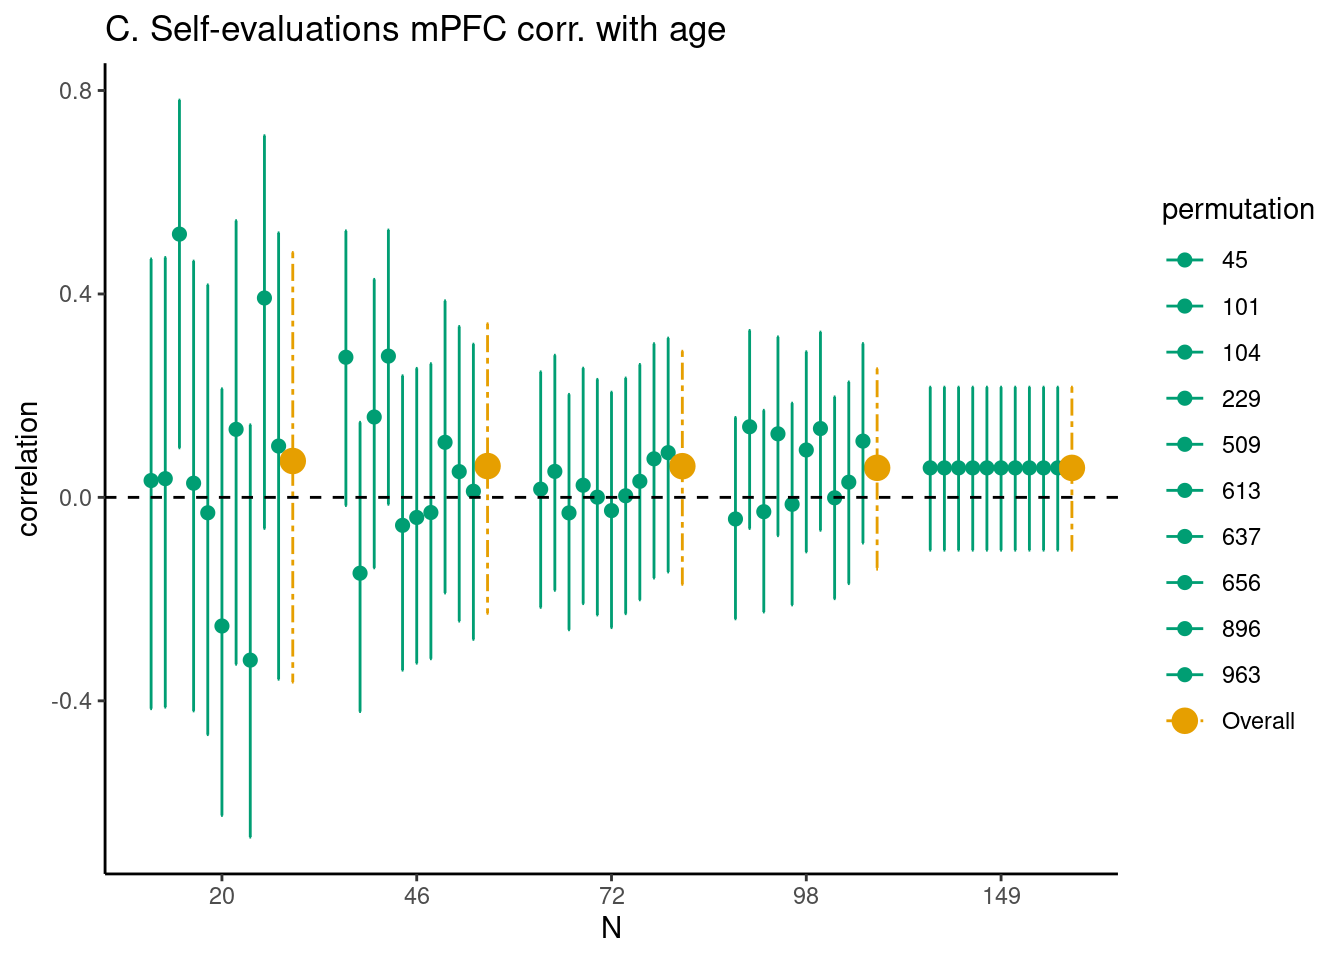

In [ ]:
# set seed
set.seed(1234)

# calculate difference mpfc_self - mpfc_control
data_self <- self_eval
data_self$dif <- data_self$mpfc_self - data_self$mpfc_control

# Estimate correlations
selfeval_fig <- estim_corr(data = data_self,
                           vars_of_interest = c("dif",
                                                "age"),
                           sample_size = 20:149, 
                           k = 1000, 
                           name = "C. Self-evaluations mPFC corr. with age")

# plot figure 3c
selfeval_fig$fig_corr


Plot Figure 4c for the Self-evaluations task mPFC ROI:

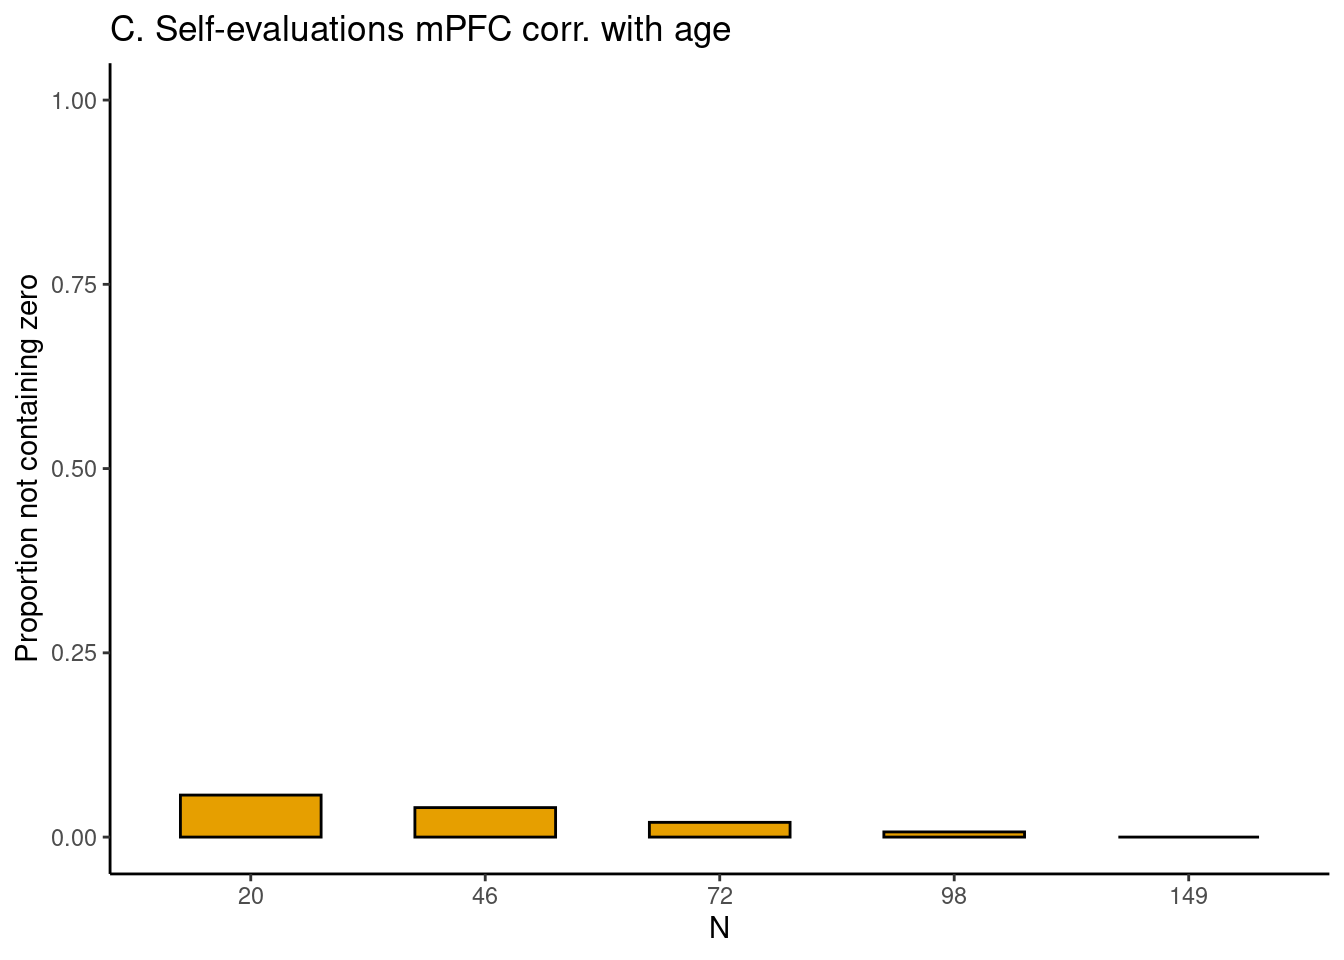

In [ ]:
# plot figure 4c
selfeval_fig$fig_corr_nozero


Set seed and create Figure 3D for the Gaining for self task NAcc ROI:

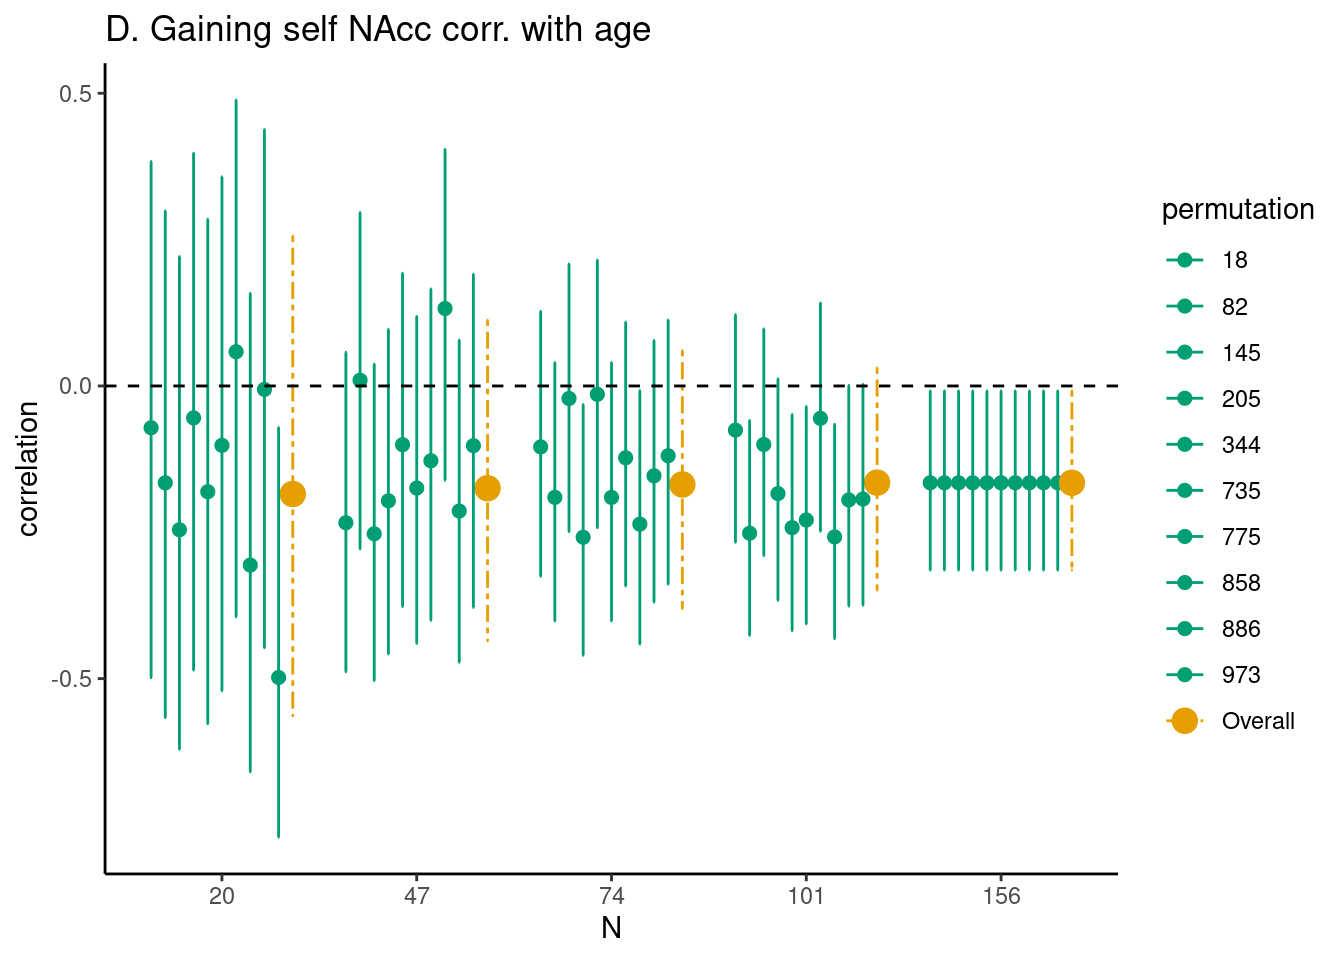

In [ ]:
# set seed
set.seed(1234)

# calculate difference nacc_selfgain vs. nacc_bothnogain
data_vicar <- vicar_char
data_vicar$dif <- data_vicar$nacc_selfgain - data_vicar$nacc_bothnogain

# Estimate correlations
vicar_char_fig <- estim_corr(data = data_vicar, 
                             vars_of_interest = c("dif", 
                                                  "age"),
                             sample_size = 20:156, 
                             k = 1000, 
                             name = "D. Gaining self NAcc corr. with age")

# plot figure 3d
vicar_char_fig$fig_corr


Plot Figure 4d for the Gaining for self task NAcc ROI:

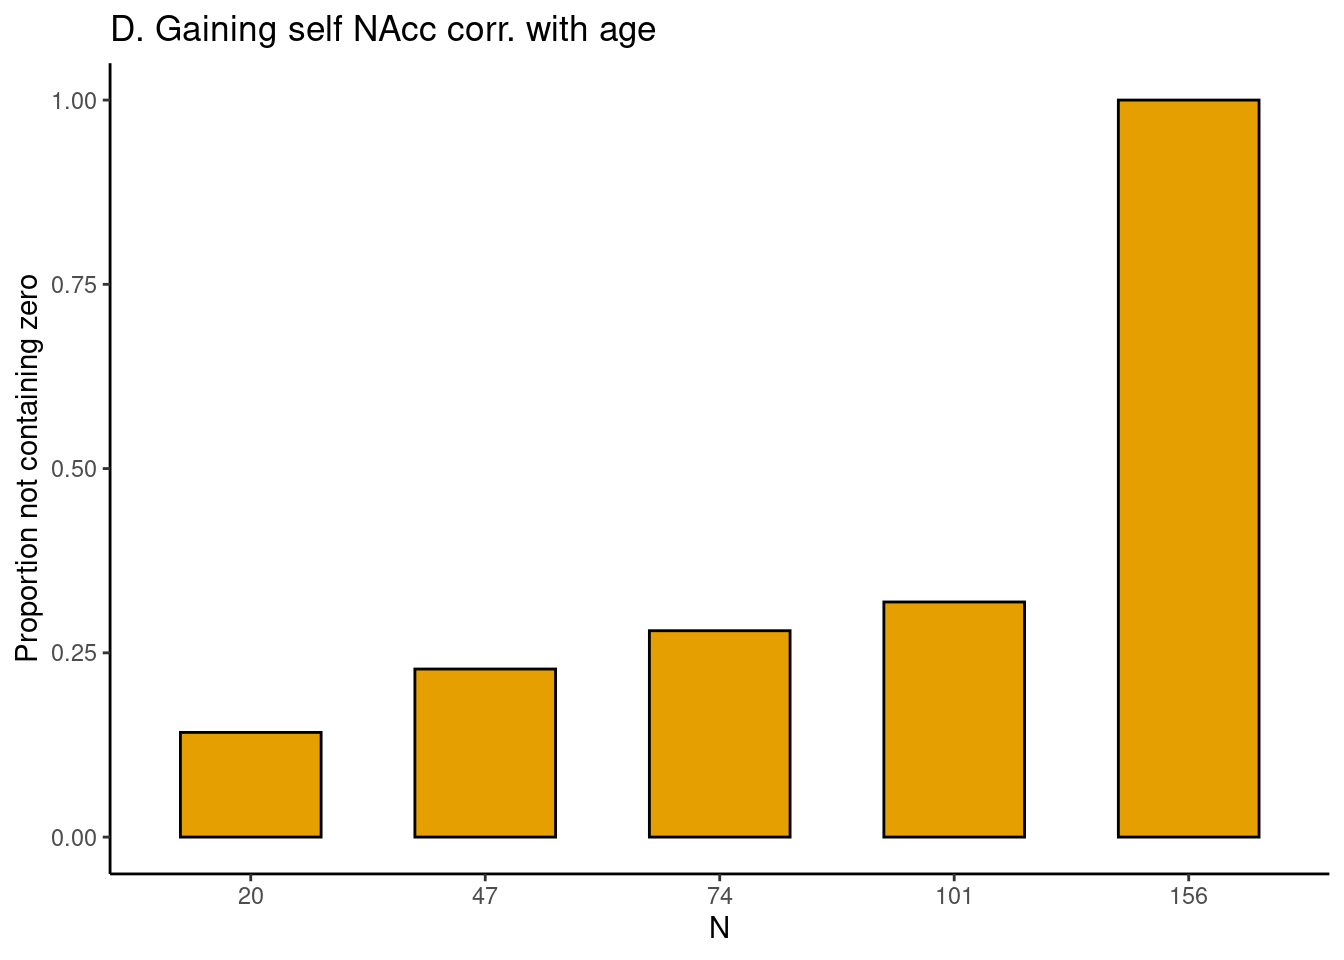

In [ ]:
# plot figure 4d
vicar_char_fig$fig_corr_nozero


Plot Figure 3 (4 data sets combined):

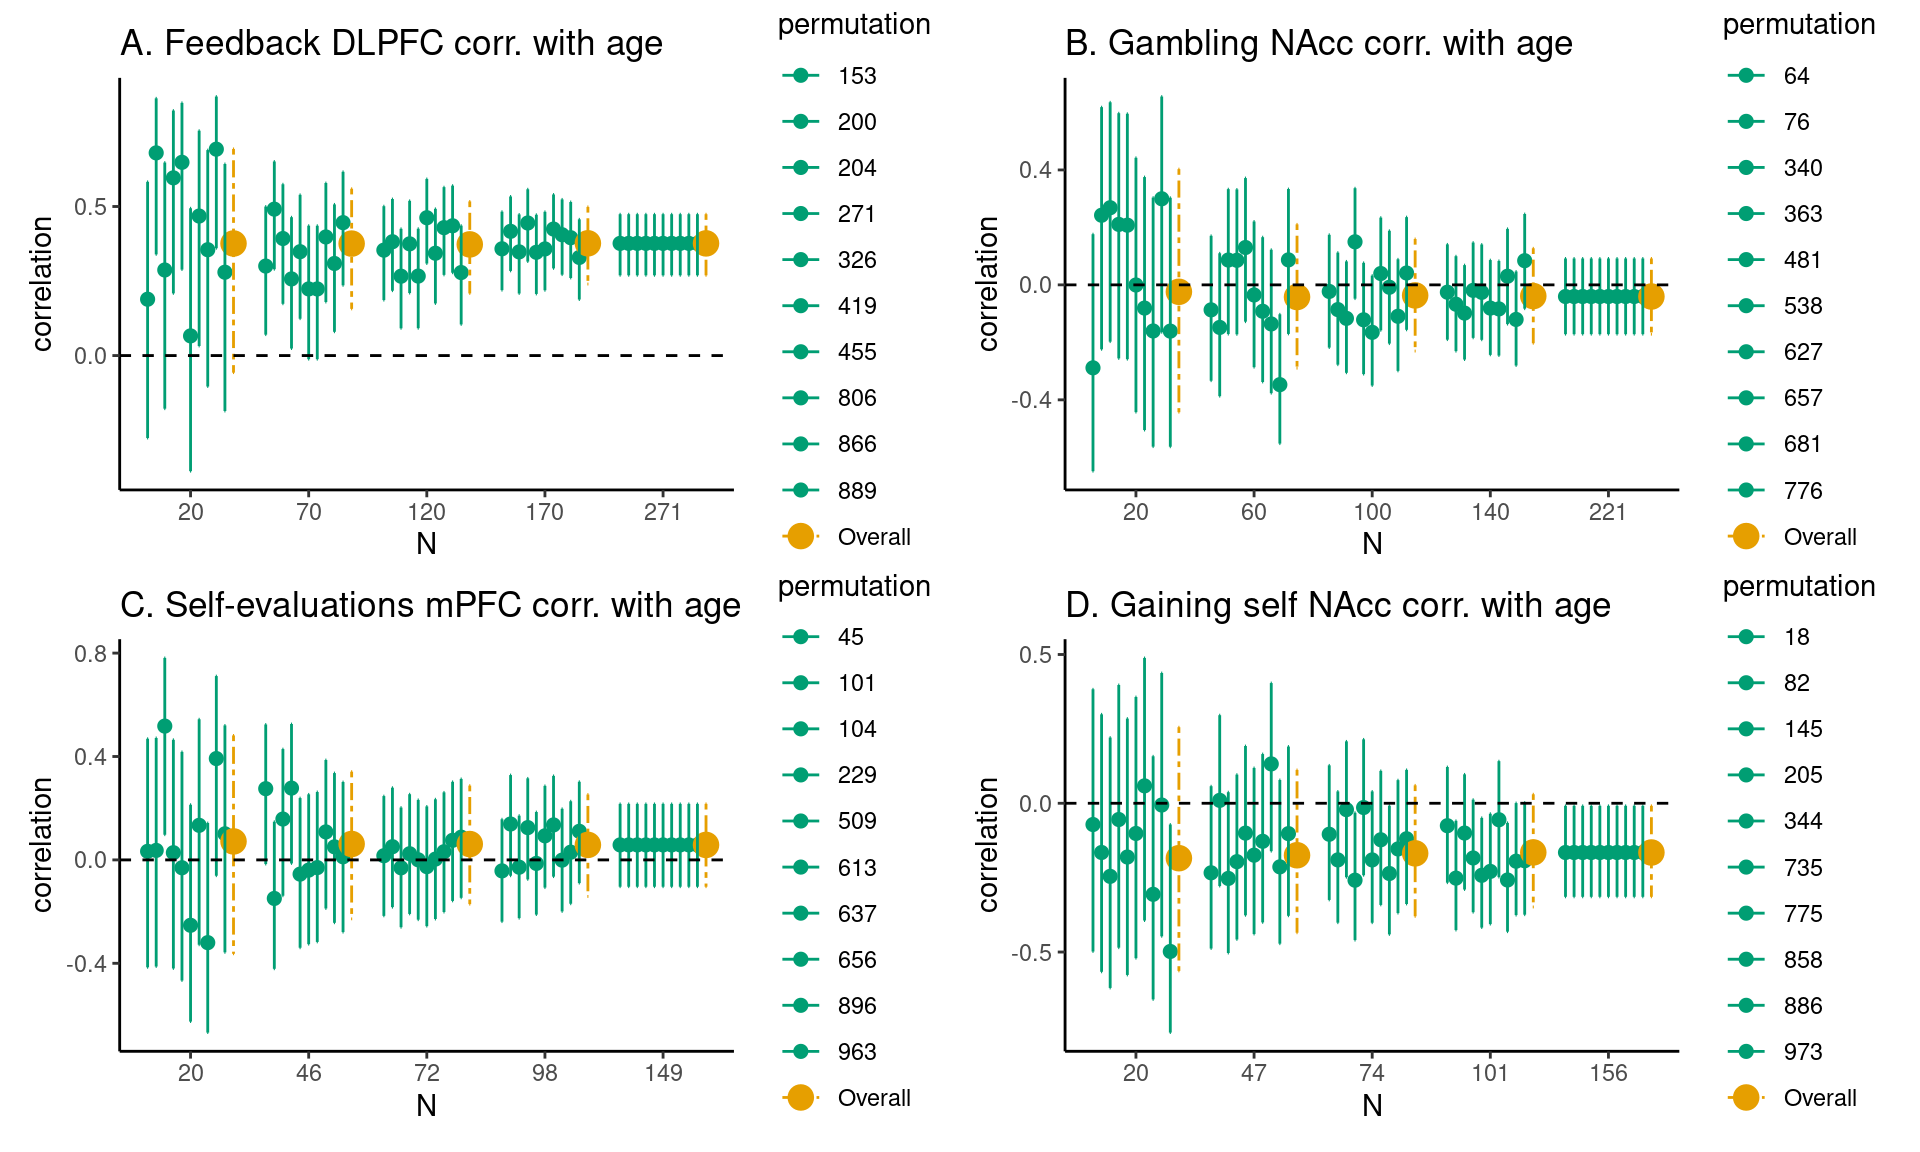

In [ ]:
# plot figure 3 using patchwork library
feedback_fig$fig_corr + gambling_fig$fig_corr + selfeval_fig$fig_corr + vicar_char_fig$fig_corr


Plot Figure 4 (4 data sets combined):

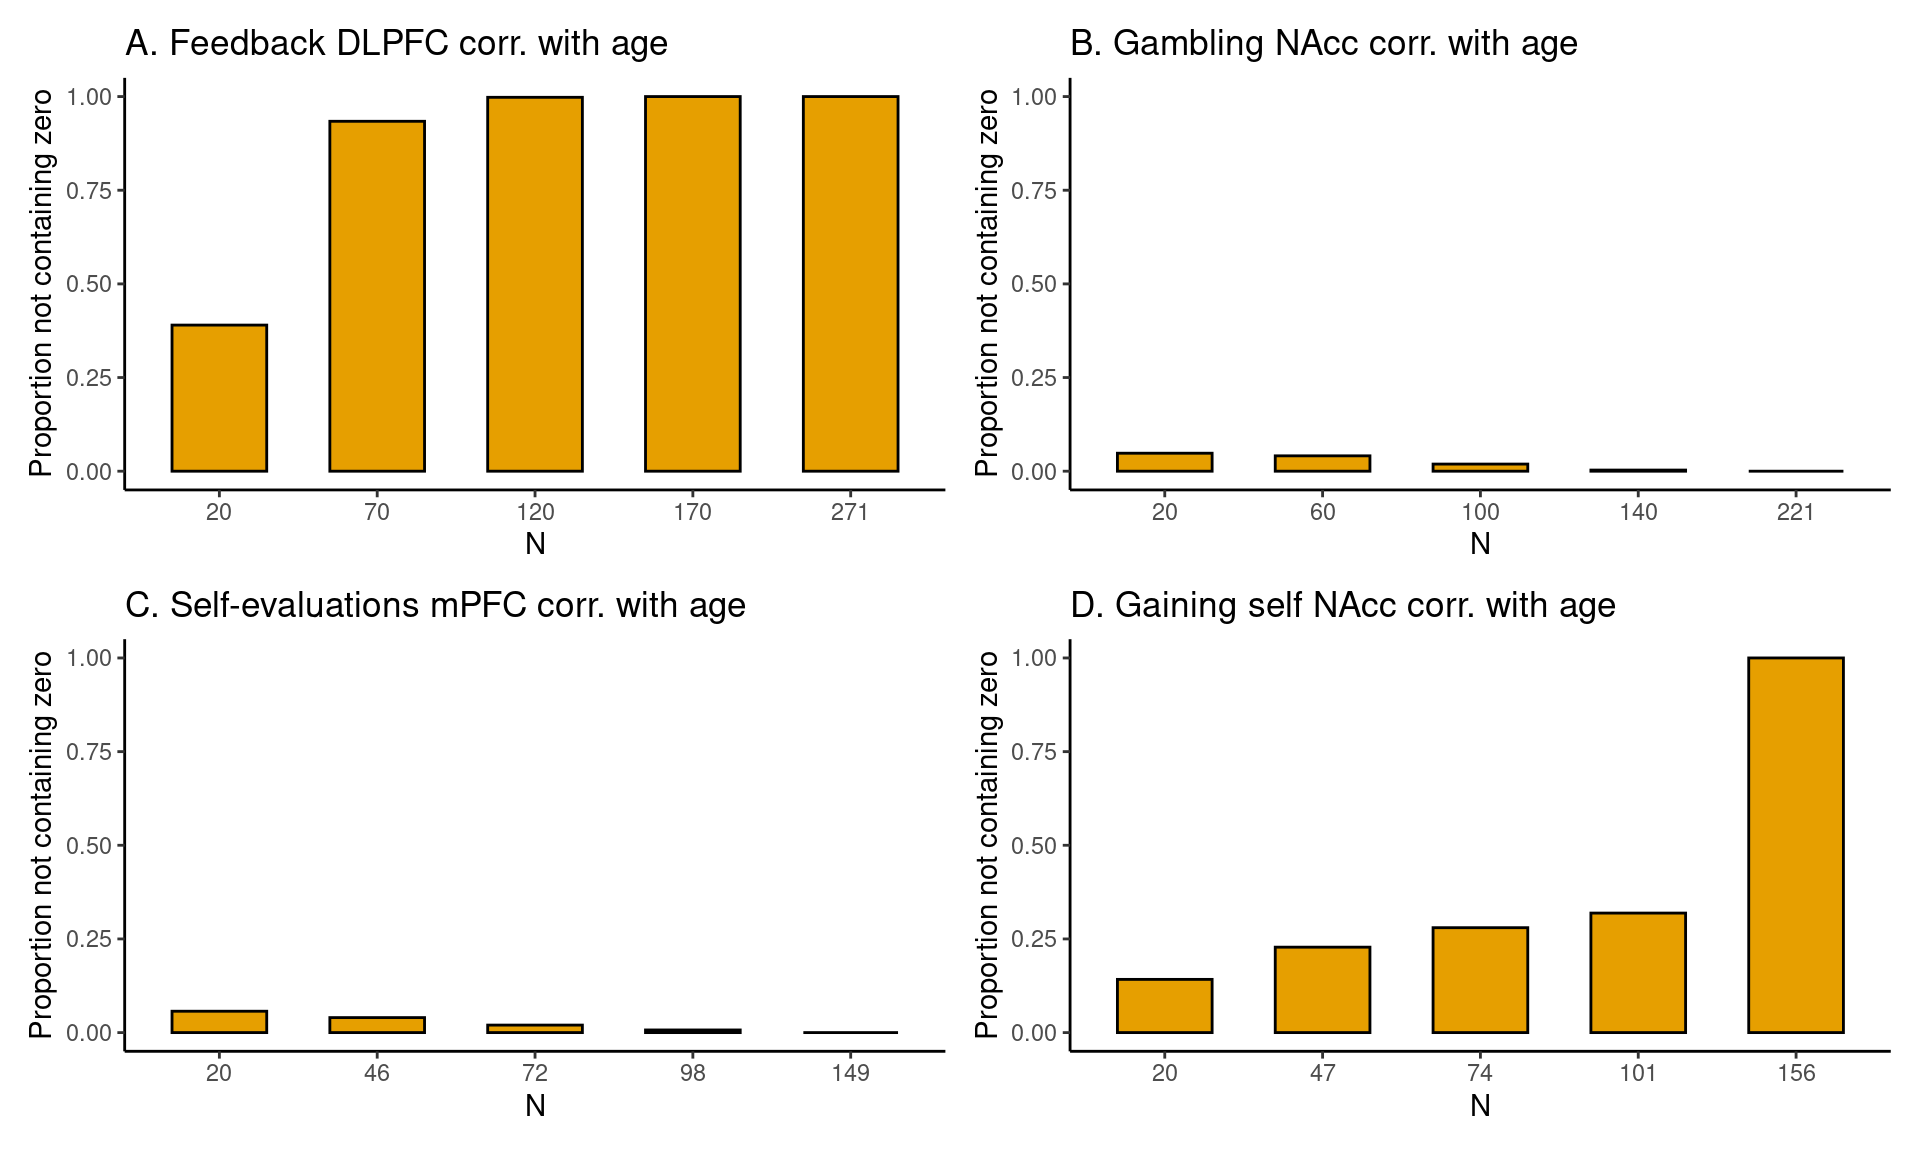

In [ ]:
# plot figure 4 using patchwork library
feedback_fig$fig_corr_nozero + gambling_fig$fig_corr_nozero + selfeval_fig$fig_corr_nozero + vicar_char_fig$fig_corr_nozero


Extract numbers to produce table 3:

In [ ]:
# first extract tibble from results (select mean only)
feedback_sum <- as_tibble(feedback_fig$tbl_select) %>%
  dplyr::filter(permutation == "Overall")
gambling_sum <- as_tibble(gambling_fig$tbl_select) %>%
  dplyr::filter(permutation == "Overall")
selfeval_sum <- as_tibble(selfeval_fig$tbl_select) %>%
  dplyr::filter(permutation == "Overall")
gaining_sum <- as_tibble(vicar_char_fig$tbl_select) %>%
  dplyr::filter(permutation == "Overall")


Use numbers to produce a table in text:

| task             | brain region | n = 20                  | n = 2/5                           | n = 3/5                            | n = 4/5                            | N = total                           |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| Feedback         | DLPFC        | **0.38** (-0.06, 0.69)  | **0.38** (0.16, 0.56), *n =* 70   | **0.37** (0.21, 0.52), *n =* 120   | **0.38** (0.24, 0.5), *n =* 170    | **0.38** (0.27, 0.47), *N* = 271    |
| Gambling         | NAcc         | **-0.02** (-0.44, 0.4)  | **-0.04** (-0.29, 0.21), *n =* 60 | **-0.04** (-0.23, 0.16), *n =* 100 | **-0.04** (-0.2, 0.13), *n =* 140  | **-0.04** (-0.17, 0.09), *N =* 221  |
| Self-evaluations | mPFC         | **0.07** (-0.36, 0.48)  | **0.06** (-0.23, 0.34), *n =* 46  | **0.06** (-0.17, 0.29), *n =* 72   | **0.06** (-0.14, 0.25), *n =* 98   | **0.06** (-0.1, 0.22), *N* = 149    |
| Gaining self     | NAcc         | **-0.18** (-0.56, 0.26) | **-0.17** (-0.44, 0.11), *n =* 47 | **-0.17** (-0.38, 0.06), *n =* 74  | **-0.17** (-0.35, 0.03), *n =* 101 | **-0.17** (-0.31, -0.01), *N* = 156 |